In [1]:
import warnings
warnings.filterwarnings('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

import pandas as pd
import networkx as nx
from pyfla.landscape import Landscape
from pyfla.problems import NK

### Synthetic Problem: Kauffman's NK Landscape

In [2]:
nk_model = NK(n=12, k=6)
df = nk_model.get_data()
X = df["config"].apply(pd.Series)
X.columns = [f"x{i}" for i in range(X.shape[1])]
f = df["fitness"]

data_types = {x: "boolean" for x in X.columns}

landscape = Landscape(X, f, maximize=True, data_types=data_types)
landscape.describe()

Creating landscape from scratch with X and f...
# Preparing data...


# Calculating neighborhoods: 100%|██████████| 4096/4096 [00:00<00:00, 87722.21it/s]


# Constructing landscape...


 - Adding edges: 100%|██████████| 4096/4096 [00:00<00:00, 123050.86it/s]


 - Adding node attributes...
# Calculating network metrics...
# Determining local optima...
-Calculating basins of attraction...


 -Local searching from each config: 100%|██████████| 4096/4096 [00:00<00:00, 68907.46it/s]

# Determining global peak...
Landscape constructed!

---
number of variables: 12
number of configurations: 4096
number of connections: 24576
number of local optima: 69


In [9]:
landscape.draw_landscape_3d(n_grids=50, rank=False)

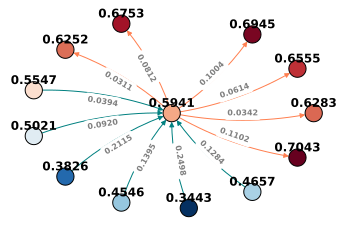

In [4]:
landscape.draw_neighborhood(node=1)

### HPO Landscape

In [4]:
data_types = {
    "learning_rate": "ordinal",
    "max_bin": "ordinal",
    "max_depth": "ordinal",
    "n_estimators": "ordinal",
    "subsample": "ordinal",
}

df = pd.read_csv("example_data/hpo_landscape.csv", index_col=0)
X = df.iloc[:,:5]
f = df["acc_test"]

landscape = Landscape(X, f, maximize=True, data_types=data_types)
lon = landscape.get_lon(min_edge_freq=0)
landscape.describe()

Creating landscape from scratch with X and f...
# Preparing data...


# Calculating neighborhoods: 100%|██████████| 14960/14960 [00:00<00:00, 82215.39it/s]


# Constructing landscape...


 - Adding edges: 100%|██████████| 14960/14960 [00:00<00:00, 213928.71it/s]


 - Adding node attributes...
# Calculating network metrics...
# Determining local optima...
-Calculating basins of attraction...


 -Local searching from each config: 100%|██████████| 14960/14960 [00:00<00:00, 49052.58it/s]


# Determining global peak...
Landscape constructed!

Constructing local optima network...


 - Creating adjacency matrix: 100%|██████████| 473/473 [00:00<00:00, 37106.63it/s]


 - Masking positions with transition frequency <= 0
# Creating LON from adjacency matrix...


# Calculating escape probability: 100%|██████████| 473/473 [00:00<00:00, 437079.93it/s]


# Calculating improve rate...
 - The LON has been reduced to M-LON by keeping only improving edges


# Calculating accessibility of LOs:: 100%|██████████| 473/473 [00:00<00:00, 26855.26it/s]

# Adding further node attributes...
# Calculating network metrics...
---
number of variables: 5
number of configurations: 14960
number of connections: 54863
number of local optima: 473


In [7]:
landscape.data_lo.corr(numeric_only=True, method="spearman")

,fitness,learning_rate,max_bin,max_depth,n_estimators,subsample,pagerank,s_basin,avg_radius_basin,max_radius_basin
fitness,1.000000,-0.705538,-0.039423,-0.607513,-0.116550,-0.359994,0.328157,0.640523,0.598387,0.624015
learning_rate,-0.705538,1.000000,0.015870,0.096979,-0.017636,0.410465,-0.138413,-0.618232,-0.672182,-0.673871
max_bin,-0.039423,0.015870,1.000000,0.003591,0.008235,0.004573,-0.163312,-0.164645,-0.134334,-0.132116
max_depth,-0.607513,0.096979,0.003591,1.000000,0.077546,0.074589,-0.071706,-0.160167,-0.069626,-0.101647
n_estimators,-0.116550,-0.017636,0.008235,0.077546,1.000000,0.056971,-0.224306,-0.053598,-0.008959,-0.010330
subsample,-0.359994,0.410465,0.004573,0.074589,0.056971,1.000000,-0.070907,-0.263855,-0.335754,-0.322090
pagerank,0.328157,-0.138413,-0.163312,-0.071706,-0.224306,-0.070907,1.000000,0.506719,0.345637,0.363762
s_basin,0.640523,-0.618232,-0.164645,-0.160167,-0.053598,-0.263855,0.506719,1.000000,0.912139,0.939147
avg_radius_basin,0.598387,-0.672182,-0.134334,-0.069626,-0.008959,-0.335754,0.345637,0.912139,1.000000,0.987886
max_radius_basin,0.624015,-0.673871,-0.132116,-0.101647,-0.010330,-0.322090,0.363762,0.939147,0.987886,1.000000


In [8]:
from pyfla.algorithms import hill_climb
lo, steps, trace = hill_climb(landscape.graph, node=1, weight="delta_fit", verbose=True, return_trace=True, search_method="first-improvement")

Hill climbing begin from 1...
#step: 1, move from 1 to 341
#step: 2, move from 341 to 361
#step: 3, move from 361 to 21
Finished at node 21 with 3 step(s).


### DNA Fitness Landscape (Science 2023)

In [5]:
df = pd.read_csv("example_data/dna_landscape.csv", index_col=0)
X = df.iloc[:,:9]
f = df["fitness"]
data_types = {x: "categorical" for x in X.columns}

landscape = Landscape(X, f, maximize=True, data_types=data_types)
lon = landscape.get_lon(min_edge_freq=0)

Creating landscape from scratch with X and f...
# Preparing data...


# Calculating neighborhoods: 100%|██████████| 135178/135178 [00:03<00:00, 38509.22it/s]


# Constructing landscape...


 - Adding edges: 100%|██████████| 135178/135178 [00:02<00:00, 59822.43it/s]


 - Adding node attributes...
# Calculating network metrics...
# Determining local optima...
-Calculating basins of attraction...


 -Local searching from each config: 100%|██████████| 135178/135178 [00:04<00:00, 27782.52it/s]


# Determining global peak...
Landscape constructed!

Constructing local optima network...


 - Creating adjacency matrix: 100%|██████████| 514/514 [00:00<00:00, 27196.92it/s]


 - Masking positions with transition frequency <= 0
# Creating LON from adjacency matrix...


# Calculating escape probability: 100%|██████████| 514/514 [00:00<00:00, 1084442.78it/s]


# Calculating improve rate...
 - The LON has been reduced to M-LON by keeping only improving edges


# Calculating accessibility of LOs:: 100%|██████████| 514/514 [00:00<00:00, 165213.60it/s]

# Adding further node attributes...
# Calculating network metrics...


### Software Configuration Landscape (ASE Submission)

In [ ]:
df = pd.read_csv("example_data/LLVM_2mm.csv")
X = df.iloc[:,:20]
f = df["run_time"]
data_types = {x: "boolean" for x in X.columns}
landscape = Landscape(X, f, maximize=True, data_types=data_types)